(300, 545, 3)


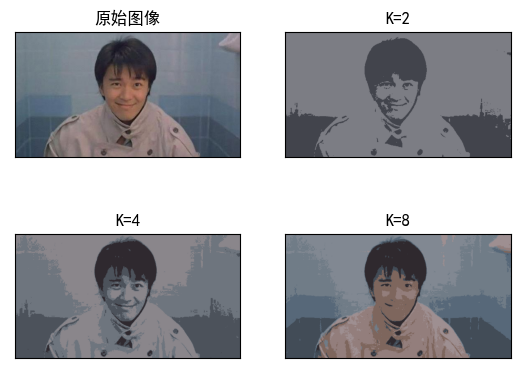

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('1.jpg') 
print (img.shape)

#三维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

#停止条件 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成2类
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 10, flags)

#K-Means聚类 聚集成4类
compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 10, flags)

#K-Means聚类 聚集成8类
compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 10, flags)

#图像转换回uint8二维类型
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]
dst2 = res.reshape((img.shape))

centers4 = np.uint8(centers4)
res = centers4[labels4.flatten()]
dst4 = res.reshape((img.shape))

centers8 = np.uint8(centers8)
res = centers8[labels8.flatten()]
dst8 = res.reshape((img.shape))

#因为plt是按照RGB的顺序显示图像的，而CV2是按照BGR的顺序读的，所以要将图像转换为RGB显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
dst4 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
dst8 = cv2.cvtColor(dst8, cv2.COLOR_BGR2RGB)

plt.rcParams['font.sans-serif']=['SimHei']  # 防止乱码

#显示图像,聚类的种类越多跟原图也就越相似
titles = [u'原始图像', 'K=2', 'K=4', 'K=8']  
images = [img, dst2, dst4, dst8]  
for i in range(4):  
   plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()
